# 01 - Airyjevi funkciji
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, oktober 2023 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
    counter-increment: h3counter;
}




</style>


---



## Uvod

Airyjevi funkciji $\text{Ai}$ in $\text{Bi}$ se v fiziki pojavljata predvsem v optiki in kvantni mehaniki. Definirani sta kot neodvisni rešitvi enačbe

$$   y''(x) -xy(x) = 0, $$ 

ki je znana kot Airyjeva oz. Stokesova enačba. To je najenostavnejša linearna diferencialna enačba drugega reda z obratno točko (tj. točko, kjer se značaj rešitev spremeni iz oscilatornega v eksponentni). Neodvisni rešitvi enačbe sta predstavljivi v integralski obliki kot

$$   \text{Ai}(x) = \frac{1}{\pi} \int_0^\infty \cos (t^3/3 + x t) \,\mathrm{d} t \>,\quad $$ 

$$   \text{Bi}(x) = \frac{1}{\pi} \int_0^\infty \left[ \mathrm{e}^{-t^3/3 + x t}
  + \sin (t^3/3 + x t) \right] \,\mathrm{d} t \>. $$

## Naloga

> Z uporabo kombinacije Maclaurinove vrste in asimptotskega razvoja poišči čim učinkovitejši postopek za izračun
vrednosti Airyjevih funkcij $\text{Ai}$ in $\text{Bi}$ na vsej realni osi
z **absolutno** napako, manjšo od $10^{-10}$. Enako naredi tudi z **relativno** napako in ugotovi,
ali je tudi pri le-tej dosegljiva natančnost, manjša od $10^{-10}$.
Pri oceni napak si pomagaj s programi, ki znajo računati s poljubno
natančnostjo.


## Ubran pristop in rešitev problema

V okviru tega poročila bomo izdelali Pythonski paket `fastAiry.py`, ki ga bomo lahko uporabili za učinkovit izračun Airyjevih funcij $\text{Ai}$ in $\text{Bi}$. Funkciji sta definirani na celotni realni osi, njuna izračunana vrednost pa se mora nahajati v okviru neke poljubne absolutne oz. relativne napake. Paket bomo intenzivno testirali na primeru, ko je zahtevana relativna in absolutna napaka manjša od $ 10^{-10}$.

### Lastnosti Airyjevih funkcij

Funkciji $\text{Ai}$ in $\text{Bi}$ sta definirani na celotni realni osi. Za vrednosti $ x \in \mathbb{R}^-$ sta obe funkciji oscilatorni in omejeni. Za $ x \in \mathbb{R}^+ \cup \{0\}$ pa je funkcija $\text{Ai}$ omejena, medtem ko $\text{Bi}$ narašča čez vse meje. 


![Airy Functions](./media/airyf.png)
> Graf funkcij $\text{Ai}$ in $\text{Bi}$

### Matematični pristop in potencialne težave

Za izračun vrednosti funkcij integralov ne bomo neposredno izvrednotili, temveč bomo funkcije razvili v Maclaurinovo in asimptotsko vrsto. Pri tem bomo pazili, da formule implementiramo rekurzivno in tako čim bolj zmanjšamo število potrebnih računskih operacij. Na grobo ocenimo, da z uporabo rekurzivnih formul zmanjšamo časovno zahtevnost programa iz $O(n^2)$ na $O(n)$, kar v računalniškem lingu razume kot "iz zelo počasi v precej hitro".

Za natančnost bomo poskrbeli z ustreznim izborom števila členov v Maclaurinovi oz. asimptotski vrsti. Ker ena vrsta podaja dober približek za zelo majhne vrednosti $x$, druga pa za zelo velike, bomo vrste v točki $x_0$ zlepili. Točko $x_0$ bomo določili na podlagi števila členov, ki jih potrebuja ena in druga vrsta za doseganje tolerirane napake.  

Potencialne težave bodo (in tudi so) predstavljale predvsem: omejitve podatkovnega tipa `float`, iskanje zanesljive referenčne vrednosti za oceno napak in iskanje minimuma napake glede na število členov asimptotske vrste.





## Ustreznost referenčne funkcije

Za primerjavo naših vrst z referenčno vrednostjo lahko uporabimo funkciji `mpmath.airyai()` in `mpmath.airybi()` iz Pythonskega paketa `mpmath`. Ker bo to naša osnova za nadaljevanje, je smiselno preveriti, če ti dve funkciji dejansko delujeta pravilno oz. dovolj natančno glede na definicijo Airyjevih funkcij. 

Z uporabo programa `Wolfram Mathematica` numerično integriramo definiciji funkcij $ \text{Ai} $ in $ \text{Bi} $ v nekaj testnih točkah s sledečimi nastavitvami:

```

xValues = Table[x, {x, -5, 15, 1}]; 
results = {};

integrandA[t_, x_] := Cos[t^3/3 + x*t];
integrandB[t_, x_] := Exp[-t^3/3 + x*t] + Sin[t^3/3 + x*t];

For[i = 1, i <= Length[xValues], i++, x = xValues[[i]];
 resultA = 
  NIntegrate[integrandA[t, x], {t, 0, Infinity}, PrecisionGoal -> 22, 
   AccuracyGoal -> 22, WorkingPrecision -> 60];
 resultB = 
  NIntegrate[integrandB[t, x], {t, 0, Infinity}, PrecisionGoal -> 22, 
   AccuracyGoal -> 22, WorkingPrecision -> 60];
 results = AppendTo[results, {x, resultA / Pi, resultB / Pi}];]

xValues = Table[x, {x, 15, 22, 1}]; 

For[i = 1, i <= Length[xValues], i++, x = xValues[[i]];
 resultA = 
  NIntegrate[integrandA[t, x], {t, 0, Infinity}, PrecisionGoal -> 20, 
   AccuracyGoal -> 20, WorkingPrecision -> 60];
 resultB = 
  NIntegrate[integrandB[t, x], {t, 0, Infinity}, PrecisionGoal -> 30, 
   AccuracyGoal -> 30, WorkingPrecision -> 60];
 results = AppendTo[results, {x, resultA / Pi, resultB / Pi}];]

```

Rezultate primarjamo s funkcijama `mpmath.airyai()` in `mpmath.airybi()`, ki ju prav tako nastavimo na 60 decimalk.

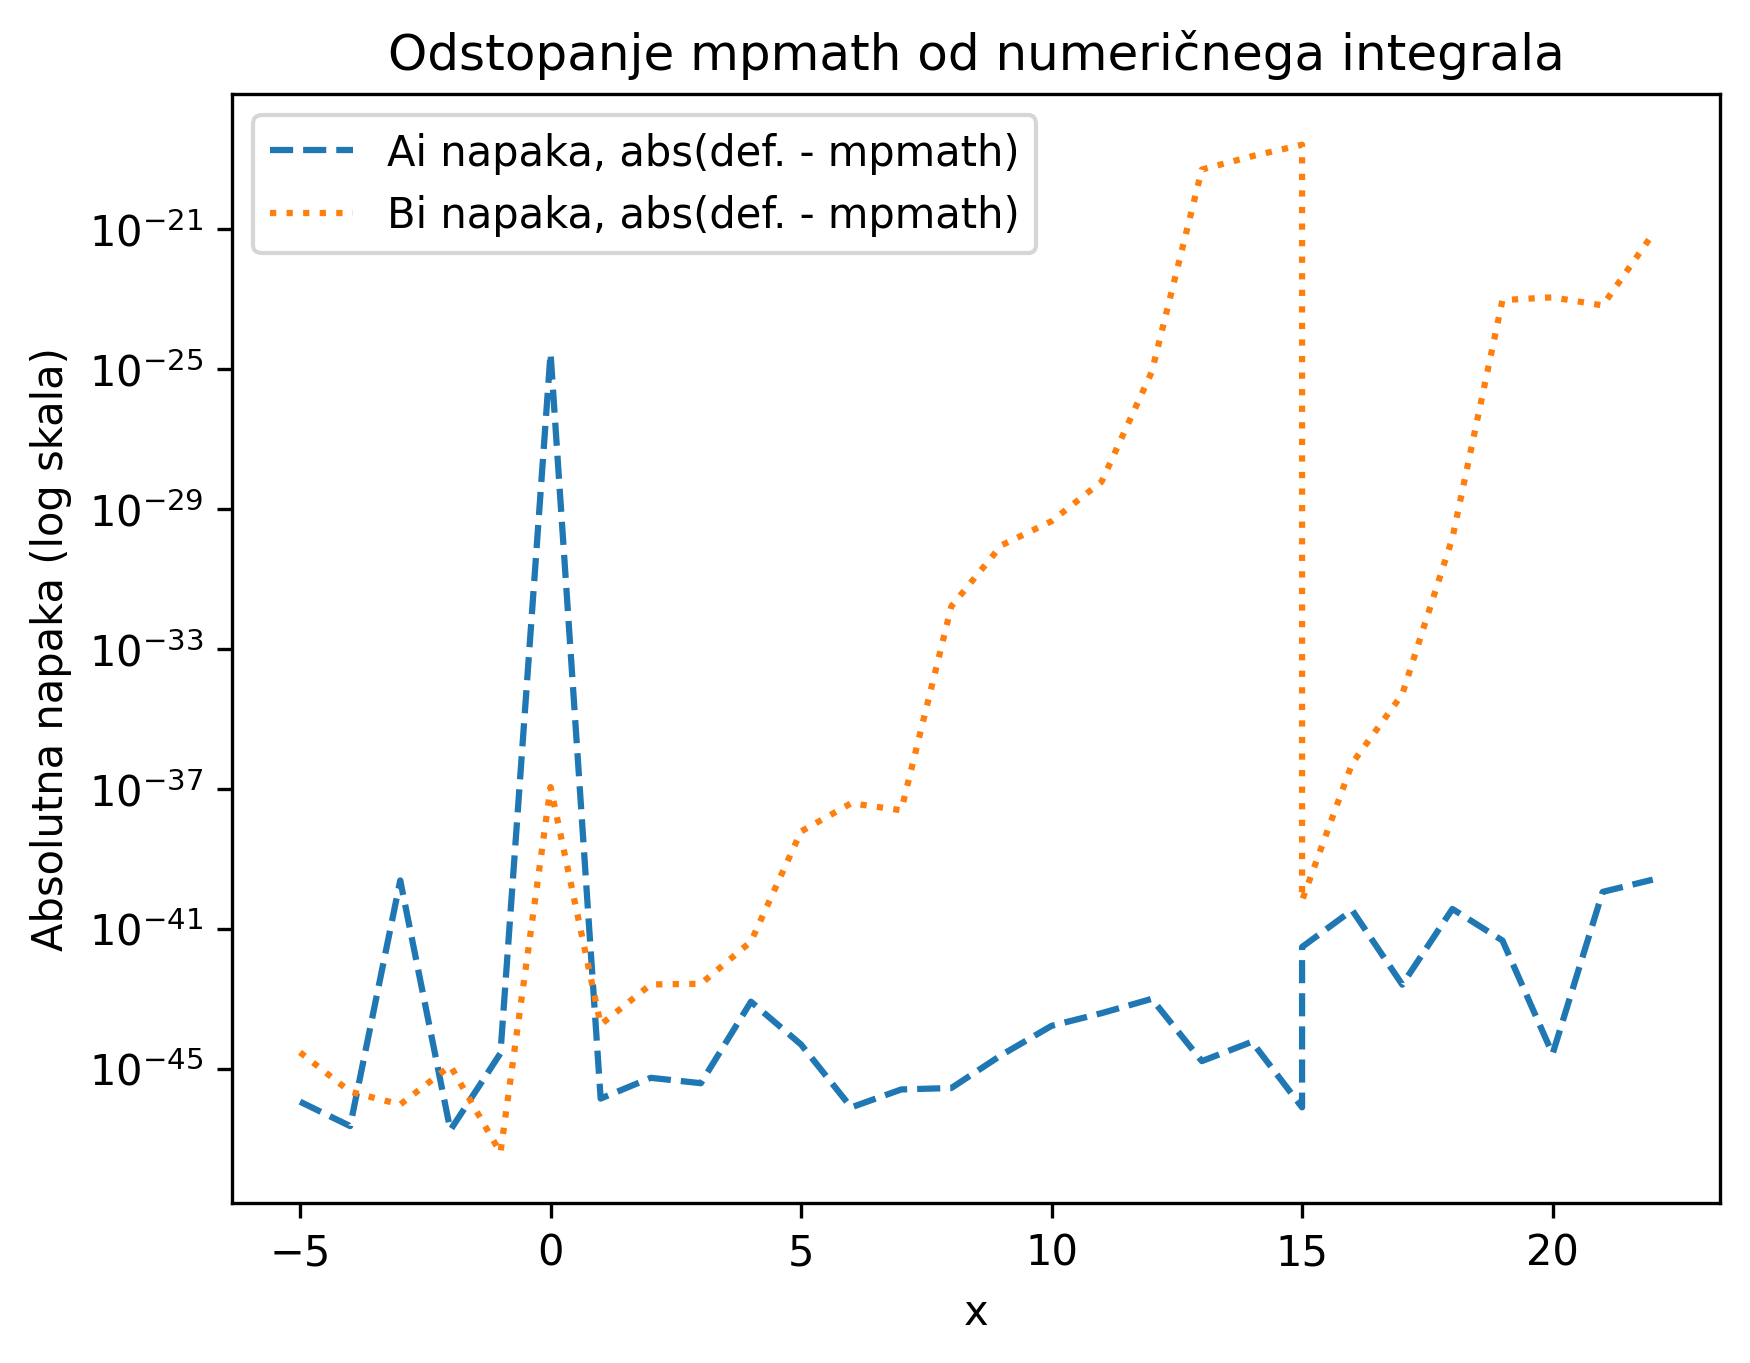

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp

mp.dps = 60
plt.rcParams['figure.dpi'] = 300

imported_df = pd.read_csv('./mathematica/all_nint.csv', dtype={'x': int, 'Ai': str, 'Bi': str})
abs_error_Ai = mp.matrix(1, imported_df.shape[0])
abs_error_Bi = mp.matrix(1, imported_df.shape[0])

for i,x in enumerate(imported_df['x']):
    x_mp = mp.mpf(x)
    abs_error_Ai[i] = np.abs(mp.airyai(x_mp) - mp.mpf(imported_df['Ai'][i]))
    abs_error_Bi[i] = np.abs(mp.airybi(x_mp) - mp.mpf(imported_df['Bi'][i]))


plt.plot(imported_df['x'], abs_error_Ai, label='Ai napaka, abs(def. - mpmath)', linestyle='--')
plt.plot(imported_df['x'], abs_error_Bi, label='Bi napaka, abs(def. - mpmath)', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('Absolutna napaka (log skala)')
plt.title('Odstopanje mpmath od numeričnega integrala')
plt.yscale('log')
plt.legend()
plt.show()


> **Odstopanje mpmath od numeričnega integrala**: Primerjanih skupno 27 točk. Pri $x=15$ povečamo Precision in AccuracyGoal. Izkaže se, da je v Mathematici dobro targetirati PrecisionGoal in AccuracyGoal vsaj 5 redov višje, saj napaka v primerjavi pada.

Iz grafa razberemo, da `mpmath.airyai()` in `mpmath.airybi()` odstopada od *dovolj natančno* izračunanega integrala za manj kot $10^{-10}$. Torej lahko za primerjavo napak uporabimo kar ti dve funkciji, saj delujeta bistveno hitreje od numerične integracije.

## Maclaurinov približek

Za majhne $x$ lahko funkciji $\text{Ai}$ in $\text{Bi}$ izrazimo z Maclaurinovima vrstama

$$ \text{Ai}(x) = \alpha f(x) - \beta g(x) $$

$$   \text{Bi}(x) = \sqrt{3}\, \Bigl[\alpha f (x) + \beta g(x) \Bigr] $$
kjer v $x=0$ velja
$\alpha = \text{Ai}(0) \approx 0.3550...$ in $\beta = -\text{Ai}'(0) \approx 0.2588...$ Vrsti za $f$ in $g$ zapišemo rekurzivno in $n$-ti člen izračunamo kot produkt prejšnjega člena in količnika:

$$ f_{n} = f_{n-1} \cdot \frac{f_n}{f_{n-1}} = f_{n-1} \cdot \frac{x^3}{(3n - 1)\, 3n}, \quad f_0 = 1$$
$$ g_{n} = g_{n-1} \cdot \frac{g_n}{g_{n-1}} = g_{n-1} \cdot \frac{x^3}{(3n + 1)\, 3n}, \quad g_0 = x$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Maclaurent series for the Airy functions

def f_mac(x, n):
    z = 1/3
    k = np.arange(1, n+1, 1)
    k_series = 1 * np.cumprod(3 * x**3 / ( (3*k+1) * (3*k+2) * (3*k+3) ) * (z + k) )
    return np.sum(k_series) + 1

def g_mac(x, n):
    z = 2/3
    k = np.arange(1, n+1, 1)
    k_series = x * np.cumprod(3 * x**3 / ( (3*k+2) * (3*k+3) * (3*k+4) ) * (z + k) )
    return np.sum(k_series) + x

def airy_mac(x_range, n=10):
    alpha = 0.355028053887817239
    beta = 0.258819403792806798
    A_i = np.zeros(len(x_range), dtype=float)
    B_i = np.zeros(len(x_range), dtype=float)
    for i, x in enumerate(x_range):
        f =  f_mac(x, n)
        g =  g_mac(x, n)
        np.put(A_i, i, alpha * f - beta * g)
        np.put(B_i, i, np.sqrt(3) * (alpha * f + beta * g))
    return [A_i, B_i]

lim_x = 1
lim_y = 1.2
x_range = np.linspace(-2, 2, 500)
A_i, B_i = airy_mac(x_range)
A_i_ref, _, B_i_ref, _ = sp.special.airy(x_range)
plt.plot(x_range, A_i, label='A_i')
plt.plot(x_range, B_i, label='B_i')
plt.plot(x_range, A_i_ref, label='A_i_ref')
plt.plot(x_range, B_i_ref, label='B_i_ref')
plt.grid()
#plt.ylim(-lim, lim)
plt.legend()
plt.show()

